In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test/9273.png
/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test/9292.png
/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test/4353.png
/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test/7968.png
/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test/6490.png
/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test/5511.png
/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test/6262.png
/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test/2664.png
/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test/8

In [12]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [3]:
datasets = ['/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/train',\
            '/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test',
           '/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset']
NUM_CLASS = 65
IMAGE_SIZE = (160,160)
BATCH_SIZE = 512
SEED = 43
EPOCHS = 50

In [4]:
train_images = tf.keras.utils.image_dataset_from_directory(
    datasets[0],
    validation_split=0.2,
    color_mode='grayscale',
    label_mode="categorical",
    subset="training",
    shuffle=True,
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)

Found 42559 files belonging to 65 classes.
Using 34048 files for training.


In [5]:
train_validation = tf.keras.utils.image_dataset_from_directory(
    datasets[0],
    validation_split=0.2,
    label_mode="categorical",
    color_mode='grayscale',
    subset="validation",
    shuffle=True,
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)

Found 42559 files belonging to 65 classes.
Using 8511 files for validation.


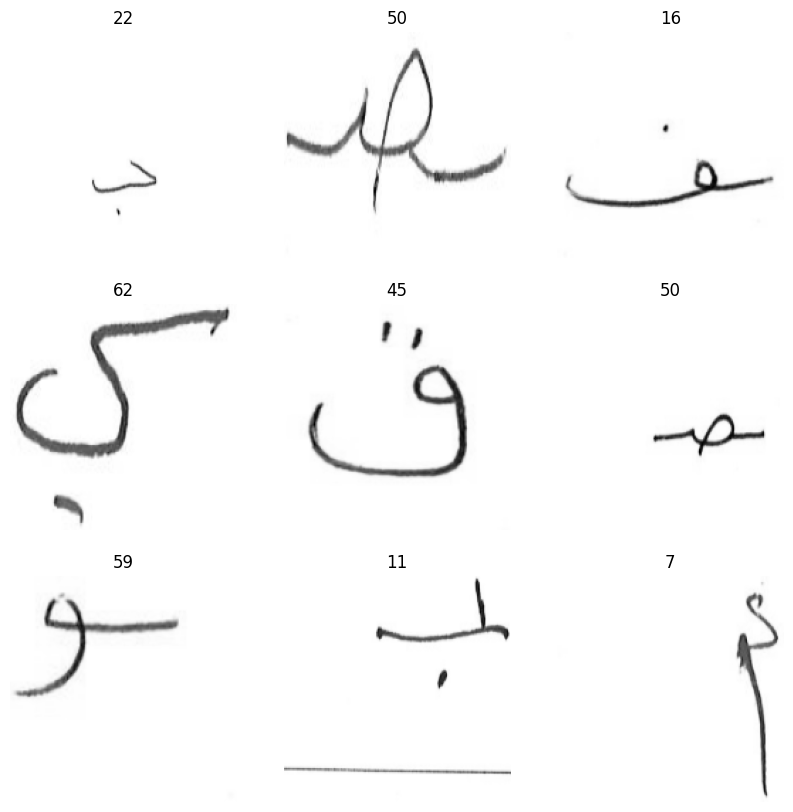

In [9]:
class_names = train_images.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_images.take(1): # Takes a batch and shows the first 9 images
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"), cmap=plt.cm.Greys_r)
        plt.title(class_names[np.where(np.array(labels[i])==1)[0][0]])
        plt.axis("off")

In [10]:
for images, labels in train_images:
    print(images.shape)
    print(labels.shape)
    break

(512, 160, 160, 1)
(512, 65)


In [14]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(NUM_CLASS, activation='softmax')
])


In [15]:
learning_rate = 0.001
lr_mod = tf.keras.optimizers.schedules.ExponentialDecay(learning_rate, decay_steps=100000,\
                                                             decay_rate=0.96, staircase=True)

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=lr_mod), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [16]:
h1 = model.fit(train_images,
              validation_data=train_validation,
              epochs=EPOCHS)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 59s 739ms/step - accuracy: 0.0139 - loss: 4.1772 - val_accuracy: 0.0289 - val_loss: 4.1451
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 257ms/step - accuracy: 0.0457 - loss: 4.0405 - val_accuracy: 0.1946 - val_loss: 3.1008
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 18s 259ms/step - accuracy: 0.1877 - loss: 3.1716 - val_accuracy: 0.4814 - val_loss: 1.7695
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 18s 263ms/step - accuracy: 0.3866 - loss: 2.1980 - val_accuracy: 0.6120 - val_loss: 1.2937
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 18s 259ms/step - accuracy: 0.5182 - loss: 1.6415 - val_accuracy: 0.6985 - val_loss: 0.9733
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 257ms/step - accuracy: 0.6107 - loss: 1.2831 - val_accuracy: 0.7479 - val_loss: 0.8075
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 255ms/step - accuracy: 0.6698 - loss: 1.0755 - val_accuracy: 0.7669 - val_loss: 0.7484
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 257ms/step - accuracy: 0.7020 - loss: 0.9664 - val_accu

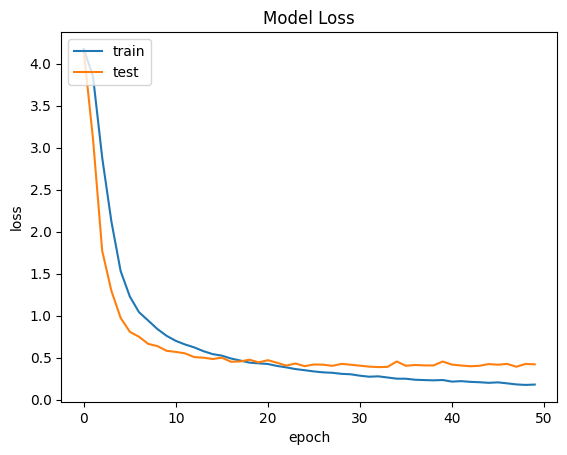

In [17]:
plt.plot(h1.history['loss'])
plt.plot(h1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

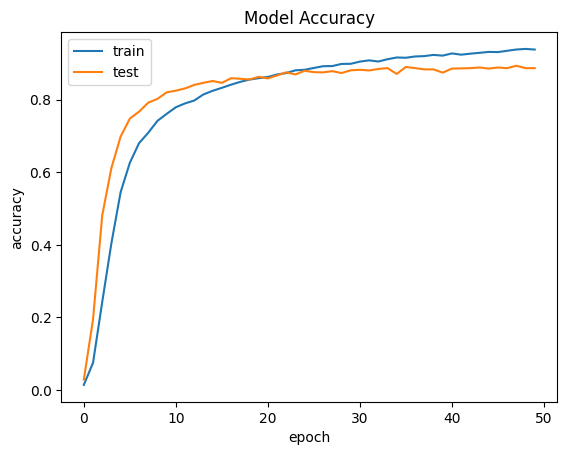

In [18]:
plt.plot(h1.history['accuracy'])
plt.plot(h1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()